In [84]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
from mvl2 import genData2
from torch import tensor

In [66]:
simParams = {
    "pis": tensor([.1, .1, .05]),
    "rrMeans": tensor([3., 2.]),
    "afShape": tensor(50.),
    "afMean": tensor(1e-4),
    "pDs": tensor([.01, .01]),
    "nCases": tensor([1.5e4, 1.5e4, 4e3]),
    "nCtrls": tensor(5e4),
    "geneticCorrelation": tensor([ [1, .8], [.8, 1] ]),
    "residualCorrelation": tensor([ [1, 0.], [0., 1] ]),
    "totalVariance": tensor(.01),
}
simParams["geneticVariance"] = simParams["totalVariance"] * .8


In [69]:
simData = genData.liabilitySumStat(**simParams)

totalVariance tensor(0.0100) geneticVariance tensor(0.0080) residualVariance tensor(0.0020)
pDsWithBoth tensor([1.0000e-02, 1.0000e-02, 1.0000e-04], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-0.3640, -0.2306],
        [-0.4488, -0.2994],
        [-0.4654, -0.3095],
        ...,
        [-0.4110, -0.2019],
        [-0.4984, -0.2467],
        [-0.4918, -0.2930]])
PDBothGivenV.mean tensor(0.0006, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(6.4275, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0305, 0.0204, 0.0006], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.79889599]
 [0.79889599 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.93535214]
 [0.93535214 1.        ]]
PDBoth1GivenV tensor([0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003

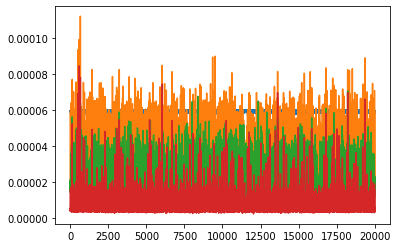

In [79]:
import matplotlib.pyplot as plt

plt.plot(simData["sampleAfs"][:, 0:])

In [80]:
from mvl2.numpyro import model, infer

mcmc = infer(model, simData["altCounts"].numpy(), simParams["nCases"].numpy(), simParams["nCtrls"].numpy())

sample: 100%|██████████| 1200/1200 [34:13<00:00,  1.71s/it, 127 steps of size 3.40e-02. acc. prob=0.88]

                 mean       std    median      5.0%     95.0%     n_eff     r_hat
    beta[0]      0.82      0.03      0.83      0.78      0.87    318.46      1.00
    beta[1]      0.46      0.07      0.46      0.34      0.58    485.38      1.00
    beta[2]      0.78      0.11      0.80      0.61      0.94    274.74      1.00
    beta[3]      1.00      0.01      1.00      1.00      1.00    887.80      1.00
    beta[4]      0.97      0.13      1.00      0.96      1.00    835.22      1.00
    beta[5]      0.97      0.11      1.00      0.97      1.00    999.79      1.00
    beta[6]      0.97      0.12      1.00      0.98      1.00   1028.34      1.00
    beta[7]      0.97      0.12      1.00      0.97      1.00    765.66      1.00
    beta[8]      0.98      0.10      1.00      0.98      1.00   1039.31      1.00
    beta[9]      0.97      0.10      1.00      0.97      1.00   1012.14    

In [82]:
from mvl2.numpyro import get_inferred_params

get_inferred_params(mcmc)

probs mean [[0.60590027 0.1742725  0.17584189 0.04398535]
 [0.4177045  0.37060619 0.12095945 0.09072985]
 [0.46023299 0.14581413 0.30574593 0.08820695]
 [0.27489742 0.31747162 0.22614121 0.18148976]
 [0.06972218 0.20259315 0.20615345 0.52153121]
 [0.06450571 0.20464962 0.19309617 0.5377485 ]
 [0.06030436 0.20050892 0.18665174 0.55253498]
 [0.04995131 0.21009906 0.19303298 0.54691665]
 [0.06566784 0.19855363 0.20773274 0.52804579]
 [0.06344892 0.20498443 0.21085535 0.5207113 ]
 [0.07191263 0.18245314 0.2003844  0.54524983]
 [0.07151836 0.1897858  0.17683745 0.5618584 ]]
inferred stick-breaking weights mean:  [0.82369784 0.08091555 0.07649522 0.02128019 0.00101877 0.00099919
 0.00099902 0.000999   0.000999   0.00099885 0.00092196 0.000999  ]
inferred stick-breaking weights stdd:  [0.02955101 0.0187681  0.03611624 0.03211115 0.03159104 0.03159118
 0.03159118 0.03159113 0.03159119 0.03158638 0.02915494 0.03159119]


({'beta': DeviceArray([[0.74954287, 0.36273403, 0.89689561, ..., 1.        ,
                0.99984804, 0.92288211],
               [0.81056164, 0.3986181 , 0.92200914, ..., 0.99997396,
                1.        , 0.99999456],
               [0.78795206, 0.38580419, 0.72472317, ..., 0.98480547,
                1.        , 0.92880091],
               ...,
               [0.83526534, 0.47884425, 0.85557615, ..., 0.99842333,
                0.99999774, 1.        ],
               [0.78107635, 0.43885716, 0.88472094, ..., 0.99979216,
                1.        , 0.99999786],
               [0.83035015, 0.42023892, 0.72132537, ..., 0.99972096,
                0.9999918 , 1.        ]], dtype=float64),
  'conc': DeviceArray([[[ 4.31621252,  3.4915597 ,  1.66874324,  2.59275791],
                [ 4.0994512 ,  2.02223833,  1.79177838,  0.65519702],
                [ 8.58574727,  5.30266429, 10.37309082,  2.02448746],
                ...,
                [ 2.99122619,  0.10854715,  3.8891461 , 

In [90]:
import copy
simParams2 = copy.copy(simParams)
simParams2["totalVariance"] = tensor(.02)
simParams2["geneticVariance"] = simParams2["totalVariance"] * .5
simParams2["phenotypicCorrelation"] = tensor([[1., .8], [.8, 1.]])

simData2 = genData.liabilitySumStat(**simParams2)

totalVariance tensor(0.0200) geneticVariance tensor(0.0100) residualVariance tensor(0.0100)
pDsWithBoth tensor([1.0000e-02, 1.0000e-02, 1.0000e-04], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-0.4055, -0.3136],
        [-0.3468, -0.1626],
        [-0.4651, -0.2590],
        ...,
        [-0.3972, -0.2850],
        [-0.4393, -0.2633],
        [-0.4964, -0.2930]])
PDBothGivenV.mean tensor(0.0007, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(6.6017, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0307, 0.0206, 0.0007], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.        0.7988061]
 [0.7988061 1.       ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.93401621]
 [0.93401621 1.        ]]
PDBoth1GivenV tensor([0.0004, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.

In [92]:
import copy
simParams2 = copy.copy(simParams)
simParams2["totalVariance"] = tensor(.02)
simParams2["geneticVariance"] = simParams2["totalVariance"] * .5
simParams2["phenotypicCorrelation"] = tensor([[1., .8], [.8, 1.]])

simData2 = genData.liabilitySumStat(**simParams2)

totalVariance tensor(0.0200) geneticVariance tensor(0.0100) residualVariance tensor(0.0100)
phenotypicCorrelation tensor([[1.0000, 0.8000],
        [0.8000, 1.0000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0038], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-0.4704, -0.1848],
        [-0.4965, -0.3035],
        [-0.4964, -0.3227],
        ...,
        [-0.3513, -0.2227],
        [-0.4782, -0.3662],
        [-0.4591, -0.3132]])
PDBothGivenV.mean tensor(0.0007, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(0.1733, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0306, 0.0205, 0.0007], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.79941885]
 [0.79941885 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.93303173]
 [0.93303173 1.        ]]
PDB

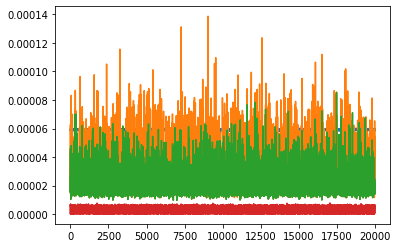

In [93]:
import matplotlib.pyplot as plt

plt.plot(simData2["sampleAfs"][:, 0:])

In [94]:
# With multiplying phenotypicCorreltion * totalVariance
import copy
simParams2 = copy.copy(simParams)
simParams2["totalVariance"] = tensor(.02)
simParams2["geneticVariance"] = simParams2["totalVariance"] * .5
simParams2["phenotypicCorrelation"] = tensor([[1., .8], [.8, 1.]])

simData2 = genData.liabilitySumStat(**simParams2)

totalVariance tensor(0.0200) geneticVariance tensor(0.0100) residualVariance tensor(0.0100)
phenotypicCorrelation tensor([[1.0000, 0.8000],
        [0.8000, 1.0000]])
pDsWithBoth tensor([1.0000e-02, 1.0000e-02, 1.5777e-68], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-0.4768, -0.2268],
        [-0.4827, -0.2192],
        [-0.4187, -0.1524],
        ...,
        [-0.3816, -0.1802],
        [-0.3691, -0.2071],
        [-0.4112, -0.3370]])
PDBothGivenV.mean tensor(0.0007, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(4.1358e+64, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0306, 0.0205, 0.0007], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.79556184]
 [0.79556184 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.93137369]
 [0.93137369 

SystemError: <method 'numel' of 'torch.Size' objects> returned a result with an error set

In [ ]:
import matplotlib.pyplot as plt

plt.plot(simData2["sampleAfs"][:, 0:])

In [98]:
import copy
simParams2 = copy.copy(simParams)
simParams2["totalVariance"] = tensor(.02)
simParams2["geneticVariance"] = simParams2["totalVariance"] * .5
simParams2["phenotypicCorrelation"] = tensor([[1., .99], [.99, 1.]])

simData2 = genData.liabilitySumStat(**simParams2)

totalVariance tensor(0.0200) geneticVariance tensor(0.0100) residualVariance tensor(0.0100)
phenotypicCorrelation tensor([[1.0000, 0.9900],
        [0.9900, 1.0000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0085], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-0.5466, -0.3024],
        [-0.4742, -0.3427],
        [-0.5139, -0.3422],
        ...,
        [-0.2576, -0.1458],
        [-0.3928, -0.2520],
        [-0.3201, -0.1504]])
PDBothGivenV.mean tensor(0.0007, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(0.0773, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0307, 0.0205, 0.0007], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.79921359]
 [0.79921359 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.93203705]
 [0.93203705 1.        ]]
PDB

In [99]:
import copy
simParams2 = copy.copy(simParams)
simParams2["totalVariance"] = tensor(.02)
simParams2["geneticVariance"] = simParams2["totalVariance"] * .5
simParams2["phenotypicCorrelation"] = tensor([[1., .8], [.8, 1.]])

simData2 = genData.liabilitySumStat(**simParams2)

totalVariance tensor(0.0200) geneticVariance tensor(0.0100) residualVariance tensor(0.0100)
phenotypicCorrelation tensor([[1.0000, 0.8000],
        [0.8000, 1.0000]])
genetiCorrelation tensor([[1.0000, 0.8000],
        [0.8000, 1.0000]])
residualCorrelation tensor([[1., 0.],
        [0., 1.]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0038], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-0.5343, -0.2580],
        [-0.5436, -0.3560],
        [-0.5496, -0.2939],
        ...,
        [-0.4602, -0.2982],
        [-0.3539, -0.1077],
        [-0.3731, -0.1248]])
PDBothGivenV.mean tensor(0.0007, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(0.1747, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0307, 0.0205, 0.0007], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.7953041

In [100]:
import copy
simParams2 = copy.copy(simParams)
simParams2["totalVariance"] = tensor(.02)
simParams2["geneticVariance"] = simParams2["totalVariance"] * .5
simParams2["phenotypicCorrelation"] = tensor([[1., .5], [.5, 1.]])

simData2 = genData.liabilitySumStat(**simParams2)

totalVariance tensor(0.0200) geneticVariance tensor(0.0100) residualVariance tensor(0.0100)
phenotypicCorrelation tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])
genetiCorrelation tensor([[1.0000, 0.8000],
        [0.8000, 1.0000]])
residualCorrelation tensor([[1., 0.],
        [0., 1.]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0013], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-0.4997, -0.3746],
        [-0.5326, -0.3298],
        [-0.2690, -0.1987],
        ...,
        [-0.3790, -0.1153],
        [-0.3977, -0.1919],
        [-0.4384, -0.3445]])
PDBothGivenV.mean tensor(0.0007, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(0.5079, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0307, 0.0205, 0.0007], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.7912749

In [125]:
import copy
simParams2 = copy.copy(simParams)
simParams2["totalVariance"] = tensor(1)
simParams2["geneticVariance"] = simParams2["totalVariance"] * .8
simParams2["phenotypicCorrelation"] = tensor([[1., .5], [.5, 1.]])

simData2 = genData.liabilitySumStat(**simParams2)

totalVariance tensor(1) geneticVariance tensor(0.8000) residualVariance tensor(0.2000)
phenotypicCorrelation tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])
genetiCorrelation tensor([[1.0000, 0.8000],
        [0.8000, 1.0000]])
residualCorrelation tensor([[1., 0.],
        [0., 1.]])
genetic_covariance tensor([[0.8000, 0.6400],
        [0.6400, 0.8000]])
residual_covariance tensor([[0.2000, 0.0000],
        [0.0000, 0.2000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0013], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-1.0958, -1.3050],
        [-0.8591, -0.7388],
        [-0.3004, -0.0609],
        ...,
        [-0.4158, -0.1467],
        [-0.8220, -0.5364],
        [-0.3743, -0.2956]])
PDBothGivenV.mean tensor(0.0141, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(10.8835, dtype=torch.float64)
pds

AssertionError: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(simData2["sampleAfs"][:, 0:])

In [244]:
r_p = tensor([[1., .1], [.1, 1.]])
r_g = tensor([[1., .5], [.5, 1.]])
v_p = tensor([.2, .2])
h2 = tensor([.9, .9])

popgen_params = genData2.get_popgen_param(h2=h2, v_p=v_p, r_p=r_p, r_g=r_g)

# popgen_params["cov_p"] = popgen_params["r_p"]
# popgen_params["cov_e"] = popgen_params["r_e"]
# popgen_params["cov_g"] = popgen_params["r_g"]
simParams2 = {
    "pi": tensor([.1, .1, .05]),
    **popgen_params,
    "RR_mean": tensor([3., 2.]),
    "PV_shape": tensor(50.),
    "PV_mean": tensor(1e-4),
    "PD": tensor([.01, .01]),
    "n_cases": tensor([1.5e4, 1.5e4, 4e3]),
    "n_ctrls": tensor(5e4)
}
simParams2

{'pi': tensor([0.1000, 0.1000, 0.0500]),
 'r_p': tensor([[1.0000, 0.1000],
         [0.1000, 1.0000]]),
 'r_g': tensor([[1.0000, 0.5000],
         [0.5000, 1.0000]]),
 'r_e': tensor([[1.0000, 0.0550],
         [0.0550, 1.0000]]),
 'v_p': tensor([0.2000, 0.2000]),
 'v_g': tensor([0.1800, 0.1800]),
 'v_e': tensor([0.0200, 0.0200]),
 'cov_p': tensor([[0.2000, 0.0200],
         [0.0200, 0.2000]]),
 'cov_g': tensor([[0.1800, 0.0900],
         [0.0900, 0.1800]]),
 'cov_e': tensor([[0.0200, 0.0011],
         [0.0011, 0.0200]]),
 'RR_mean': tensor([3., 2.]),
 'PV_shape': tensor(500.),
 'PV_mean': tensor(1.0000e-04),
 'PD': tensor([0.0100, 0.0100]),
 'n_cases': tensor([15000., 15000.,  4000.]),
 'n_ctrls': tensor(50000.)}

In [ ]:
N = simParams2["n_cases"].sum() + simParams2["n_ctrls"]
N

In [ ]:
PD_hat = tensor([1 - (simParams2["n_cases"] / N).sum(), *(simParams2["n_cases"] / N)])
PD_hat

In [245]:
simData2 = genData.gen_counts(**simParams2)

cov_p[0,0] tensor(0.2000)
cov_p[1,1] tensor(0.2000)
thresholds 1&2 tensor(-2.3263) tensor(-2.3263)
PD_with_both tensor([0.0100, 0.0100, 0.0002], dtype=torch.float64)
pd_target tensor([0.0300, 0.0200])
mean_effects tensor([0.4456, 0.2726])
effects_given_affects_both tensor([[-0.3006, -0.8565],
        [ 0.1173, -0.1961],
        [-1.1391, -0.5941],
        ...,
        [-0.2768,  0.3506],
        [-0.2804, -0.5846],
        [ 0.1297, -0.3669]])
PD12V_given_affects_both.mean tensor(0.0017, dtype=torch.float64)
PD12V_given_affects_both / PDBoth tensor(9.0686, dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.43368474]
 [0.43368474 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.72674034]
 [0.72674034 1.        ]]
PD12V_given_affects_1 tensor([0.0003, 0.0003, 0.0002,  ..., 0.0003, 0.0001, 0.0005],
       dtype=torch.float64)
PD12V_given_affects_2 tensor([3.4285e-04, 1.3383e-04, 1.9766e-04,  ..., 2.5597e-04, 3.9809e-04,
        8.4441e

In [61]:
simParams2

{'pis': tensor([0.1000, 0.1000, 0.0500]),
 'rrMeans': tensor([3., 2.]),
 'afShape': tensor(50.),
 'afMean': tensor(1.0000e-04),
 'pDs': tensor([0.0100, 0.0100]),
 'nCases': tensor([15000., 15000.,  4000.]),
 'nCtrls': tensor(50000.),
 'phenotypicCovariance': tensor([[1.0000, 0.5000],
         [0.5000, 1.0000]]),
 'geneticCovariance': tensor([[1.0000, 0.8000],
         [0.8000, 1.0000]]),
 'residualCovariance': tensor([[1., 0.],
         [0., 1.]]),
 'fudgeFactor': tensor(1.)}

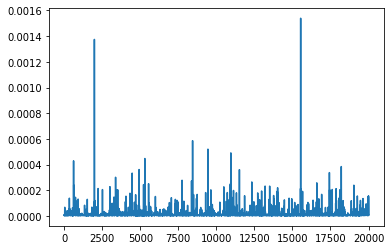

In [259]:
import matplotlib.pyplot as plt

plt.plot(simData2["PVD_PD_hats"][:, 3])

In [247]:
(simData2["PVD_PD_hats"][simData2["unaffected_genes"], 0:] / PD_hat).mean(0)

tensor([1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04], dtype=torch.float64)

In [252]:
(simData2["PVD_PD_hats"][simData2["affected_genes"][2]] / PD_hat).mean(0)

tensor([9.4872e-05, 3.9468e-04, 2.9318e-04, 8.5857e-04], dtype=torch.float64)

In [261]:
from mvl2.numpyro import model, infer

run_params = {
    "data": simData2["alt_counts"].numpy(),
    "n_cases": simParams2["n_cases"].numpy(),
    "n_ctrls": simParams2["n_ctrls"].numpy(),
    "max_tree_depth": 8
}

mcmc = infer(model, **run_params)

sample: 100%|██████████| 1200/1200 [32:55<00:00,  1.65s/it, 127 steps of size 9.56e-02. acc. prob=0.86]

                 mean       std    median      5.0%     95.0%     n_eff     r_hat
    beta[0]      0.78      0.02      0.79      0.76      0.82    346.87      1.01
    beta[1]      0.50      0.04      0.51      0.43      0.57    241.06      1.01
    beta[2]      0.71      0.05      0.71      0.63      0.79    387.09      1.01
    beta[3]      0.37      0.16      0.42      0.12      0.58      7.42      1.02
    beta[4]      0.36      0.17      0.40      0.10      0.59      9.98      1.07
    beta[5]      0.46      0.21      0.52      0.07      0.72     16.12      1.00
    beta[6]      0.61      0.20      0.66      0.28      0.90     55.75      1.00
    beta[7]      0.69      0.20      0.75      0.38      0.98     33.20      1.03
    beta[8]      0.81      0.24      0.96      0.43      1.00     17.85      1.01
    beta[9]      0.96      0.14      1.00      0.92      1.00     79.28    

In [263]:
from mvl2.numpyro import get_inferred_params

params_res = get_inferred_params(mcmc)

probs mean [[0.59799353 0.17592534 0.18039107 0.04569007]
 [0.39653881 0.43764112 0.10950054 0.05631953]
 [0.42533685 0.14482724 0.38020529 0.04963062]
 [0.2016755  0.3422589  0.27656341 0.17950219]
 [0.14864554 0.46920872 0.16236678 0.21977897]
 [0.12542574 0.32909441 0.27409116 0.27138869]
 [0.11908869 0.29411087 0.31349026 0.27331018]
 [0.09947061 0.15802847 0.48123467 0.26126625]
 [0.04696307 0.20097851 0.32544767 0.42661075]
 [0.05081972 0.19467318 0.25466779 0.49983931]
 [0.056157   0.19871587 0.196268   0.54885913]
 [0.06729312 0.19523022 0.18947665 0.548     ]]
inferred stick-breaking weights mean:  [7.83711138e-01 1.09104493e-01 7.75051883e-02 1.17376655e-02
 6.75843158e-03 5.60900384e-03 5.15789581e-03 2.52772642e-03
 1.36577576e-03 4.85763766e-04 1.01347598e-03 9.99157672e-04]
inferred stick-breaking weights stdd:  [0.02045956 0.01827464 0.02259771 0.01044839 0.00655173 0.0039749
 0.02359352 0.01263091 0.02678845 0.0106139  0.03159085 0.03159118]


In [292]:
!pip install dill

You should consider upgrading via the '/Users/alexkotlar/miniconda3/bin/python3.7 -m pip install --upgrade pip' command.


In [293]:
import dill
import time
import datetime
import os

folder = datetime.datetime.now().strftime('%h-%d-%y-%H-%M-%S')
folder = f"tree_depth_8-{folder}"
os.mkdir(folder)

with open(f"{folder}/inferred_params.pickle", "wb") as f:
    dill.dump(params_res, f)

with open(f"{folder}/mcmc.pickle", "wb") as f:
    mcmc_to_save = copy(mcmc)
    mcmc.sampler._sample_fn = None  # pylint: disable=protected-access
    mcmc.sampler._init_fn = None  # pylint: disable=protected-access
    mcmc.sampler._constrain_fn = None  # pylint: disable=protected-access
    mcmc._cache = {}  # pylint: disable=protected-access
    dill.dump(mcmc, f)

with open(f"{folder}/sim_data.pickle", "wb") as f:
    dill.dump(simData2, f)

with open(f"{folder}/run_params.pickle", "wb") as f:
    dill.dump(run_params, f)

In [76]:
from mvl2.numpyro import model, infer

mcmc2 = infer(model, simData2["altCounts"].numpy(), simParams2["nCases"].numpy(), simParams2["nCtrls"].numpy(), max_tree_depth=10)

sample: 100%|██████████| 1200/1200 [39:41<00:00,  1.98s/it, 127 steps of size 4.09e-02. acc. prob=0.92]

                 mean       std    median      5.0%     95.0%     n_eff     r_hat
    beta[0]      0.92      0.00      0.92      0.92      0.93    626.08      1.00
    beta[1]      0.38      0.03      0.38      0.33      0.42   1152.54      1.00
    beta[2]      0.08      0.02      0.08      0.06      0.11    939.11      1.00
    beta[3]      0.71      0.04      0.71      0.65      0.77    875.69      1.00
    beta[4]      0.49      0.07      0.49      0.37      0.59    682.83      1.00
    beta[5]      0.89      0.05      0.89      0.80      0.96    785.06      1.00
    beta[6]      0.63      0.18      0.64      0.39      0.97   1108.03      1.00
    beta[7]      0.99      0.04      1.00      0.99      1.00    985.68      1.00
    beta[8]      0.97      0.13      1.00      0.97      1.00    968.37      1.00
    beta[9]      0.97      0.12      1.00      0.97      1.00    759.79    

In [77]:
get_inferred_params(mcmc2)

probs mean [[0.60310042 0.17665144 0.17487944 0.0453687 ]
 [0.32293906 0.5609899  0.1023064  0.01376464]
 [0.15194829 0.0439995  0.78516812 0.01888409]
 [0.36688519 0.10814999 0.51245349 0.01251133]
 [0.17076248 0.39411367 0.37538162 0.05974223]
 [0.13764264 0.80379528 0.04301731 0.01554477]
 [0.05904926 0.67028134 0.16466069 0.10600871]
 [0.03960908 0.39938316 0.39752942 0.16347834]
 [0.07091213 0.1928942  0.20506864 0.53112503]
 [0.06139646 0.2045659  0.20301597 0.53102166]
 [0.06745073 0.20149652 0.18949959 0.54155316]
 [0.07149326 0.17628582 0.20776113 0.54445979]]
inferred stick-breaking weights mean:  [0.92271397 0.02943854 0.00410311 0.03221052 0.00677187 0.00662257
 0.0012926  0.00126352 0.00100112 0.00099907 0.00099901 0.000999  ]
inferred stick-breaking weights stdd:  [0.00495896 0.01193798 0.0033199  0.02091991 0.0150546  0.02701634
 0.02615529 0.03136501 0.03159112 0.03159118 0.03159119 0.03159119]


({'beta': DeviceArray([[0.93292795, 0.39616188, 0.09439603, ..., 1.        ,
                1.        , 1.        ],
               [0.92643493, 0.3850153 , 0.09529657, ..., 0.99652214,
                1.        , 1.        ],
               [0.91301308, 0.38537642, 0.06940297, ..., 0.99999795,
                1.        , 0.99999831],
               ...,
               [0.93152829, 0.35775596, 0.08380446, ..., 1.        ,
                0.67375671, 0.99999991],
               [0.9149538 , 0.40231655, 0.08778971, ..., 0.99830315,
                1.        , 1.        ],
               [0.92841805, 0.30723809, 0.07529208, ..., 0.99999921,
                0.99999977, 1.        ]], dtype=float64),
  'conc': DeviceArray([[[5.74836783e+00, 2.07397406e+00, 2.63378227e+00,
                 3.21375967e-01],
                [2.47567113e+00, 1.02395005e+01, 1.93039400e+00,
                 1.20749948e+00],
                [1.67280624e+00, 1.89970531e+00, 1.70548341e+01,
                 8.03833